In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
car_prices = pd.read_csv('Car_Price_Prediction.csv')
df = car_prices.copy()

In [3]:
df.sample(5)

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
668,BMW,Model A,2009,2.1,25816,Diesel,Manual,28212.570244
571,Ford,Model A,2021,1.7,153797,Diesel,Automatic,25383.611523
515,Audi,Model A,2018,4.1,78047,Petrol,Manual,29748.427417
628,Honda,Model B,2018,3.6,557,Electric,Automatic,34453.883955
490,Honda,Model D,2013,4.1,97285,Diesel,Automatic,27354.622443


In [4]:
df.rename({'Make': 'make',
           'Model':'model',
           'Year' : 'year',
           'Engine Size':'engine_size',
           'Mileage':'mileage',
           'Fuel Type':'fuel_type',
           'Transmission':'transmission',
           'Price':'price'}, axis=1, inplace=True)

In [5]:
df.columns

Index(['make', 'model', 'year', 'engine_size', 'mileage', 'fuel_type',
       'transmission', 'price'],
      dtype='object')

In [6]:
df.head()

,make,model,year,engine_size,mileage,fuel_type,transmission,price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [7]:
df.shape

(1000, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          1000 non-null   object 
 1   model         1000 non-null   object 
 2   year          1000 non-null   int64  
 3   engine_size   1000 non-null   float64
 4   mileage       1000 non-null   int64  
 5   fuel_type     1000 non-null   object 
 6   transmission  1000 non-null   object 
 7   price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [9]:
df[df.duplicated()]

,make,model,year,engine_size,mileage,fuel_type,transmission,price


In [10]:
numeric_columns =  [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_columns =  [feature for feature in df.columns if df[feature].dtype == 'O']

In [11]:
print('Numeric Columns:', numeric_columns)
print('Categorical Columns:', categorical_columns)

Numeric Columns: ['year', 'engine_size', 'mileage', 'price']
Categorical Columns: ['make', 'model', 'fuel_type', 'transmission']


In [12]:
for column in categorical_columns:
    print(f'{column}:', df[column].unique())

make: ['Honda' 'Ford' 'BMW' 'Audi' 'Toyota']
model: ['Model B' 'Model C' 'Model A' 'Model D' 'Model E']
fuel_type: ['Petrol' 'Electric' 'Diesel']
transmission: ['Manual' 'Automatic']


In [13]:
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
year,1000.0,2010.68800,6.288577,2000.000000,2005.00000,2011.000000,2016.000000,2021.000000
engine_size,1000.0,2.79830,1.024137,1.000000,1.90000,2.800000,3.700000,4.500000
mileage,1000.0,97192.48700,59447.315760,56.000000,44768.75000,94411.500000,148977.750000,199867.000000
price,1000.0,25136.61553,5181.401368,6704.953524,21587.87837,25189.325247,28806.368974,41780.504635


In [14]:
df[categorical_columns].describe().T

,count,unique,top,freq
make,1000,5,Ford,225
model,1000,5,Model B,212
fuel_type,1000,3,Diesel,344
transmission,1000,2,Manual,511


In [15]:
df.isna().sum()

make            0
model           0
year            0
engine_size     0
mileage         0
fuel_type       0
transmission    0
price           0
dtype: int64

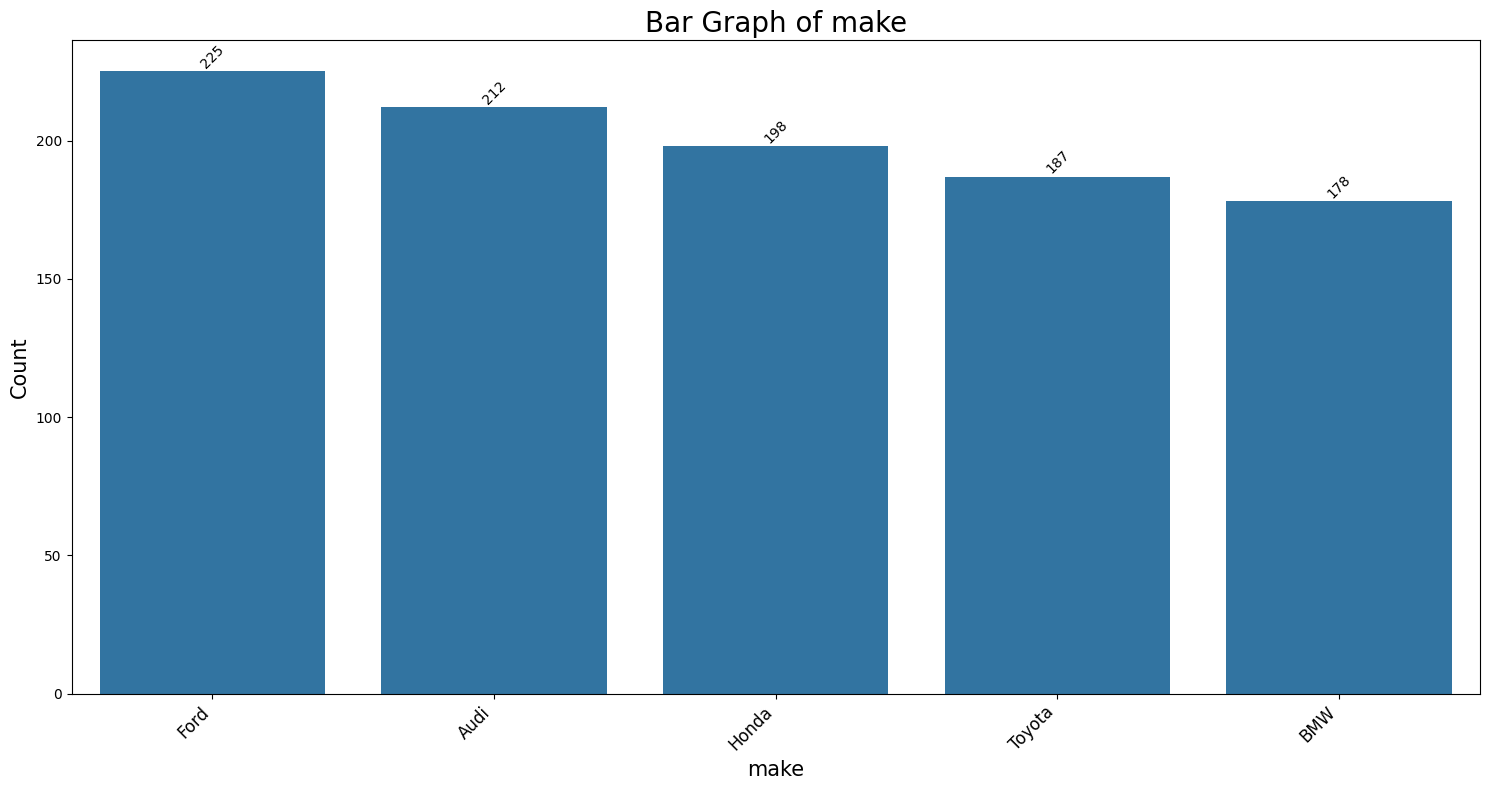

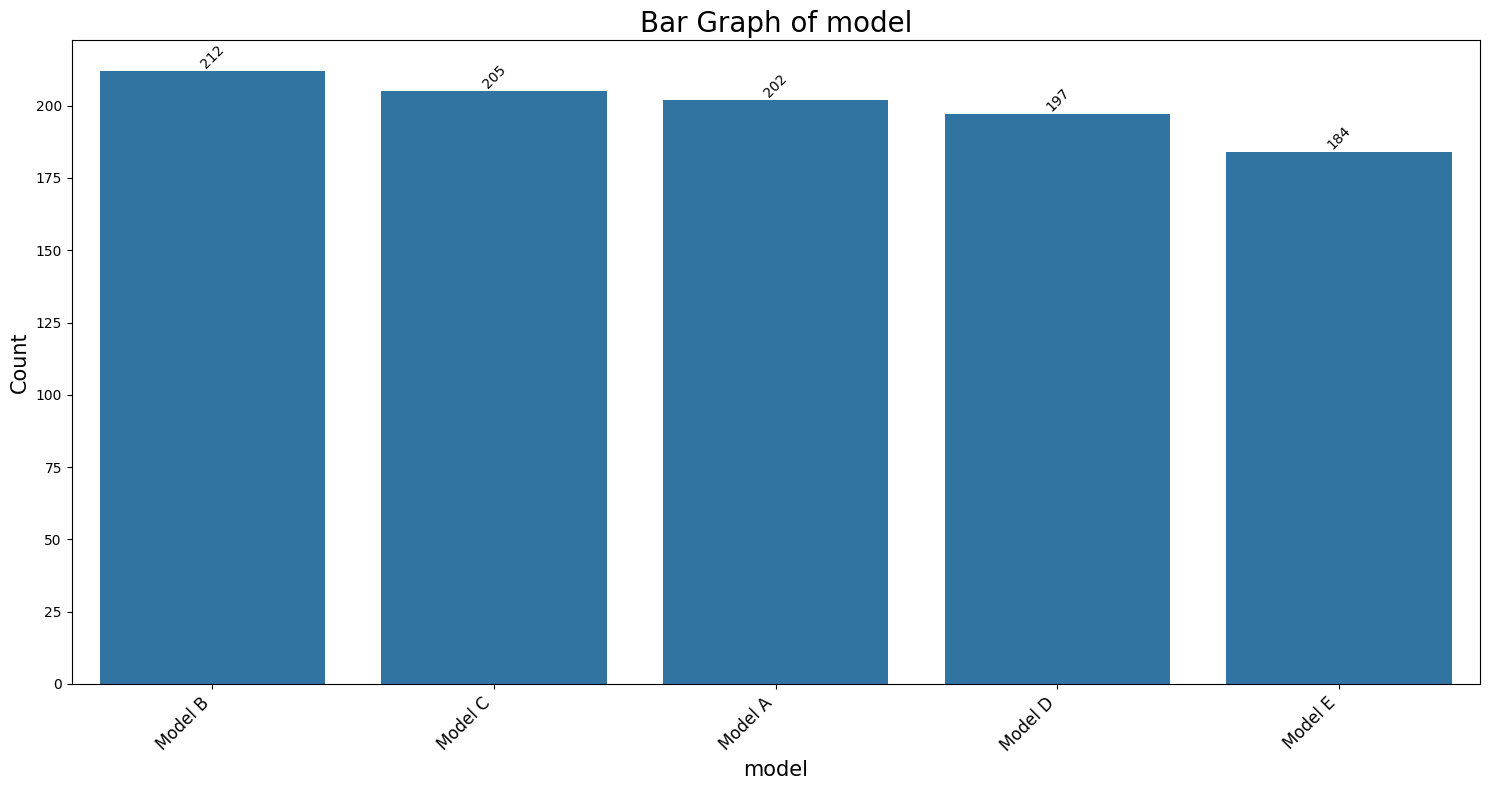

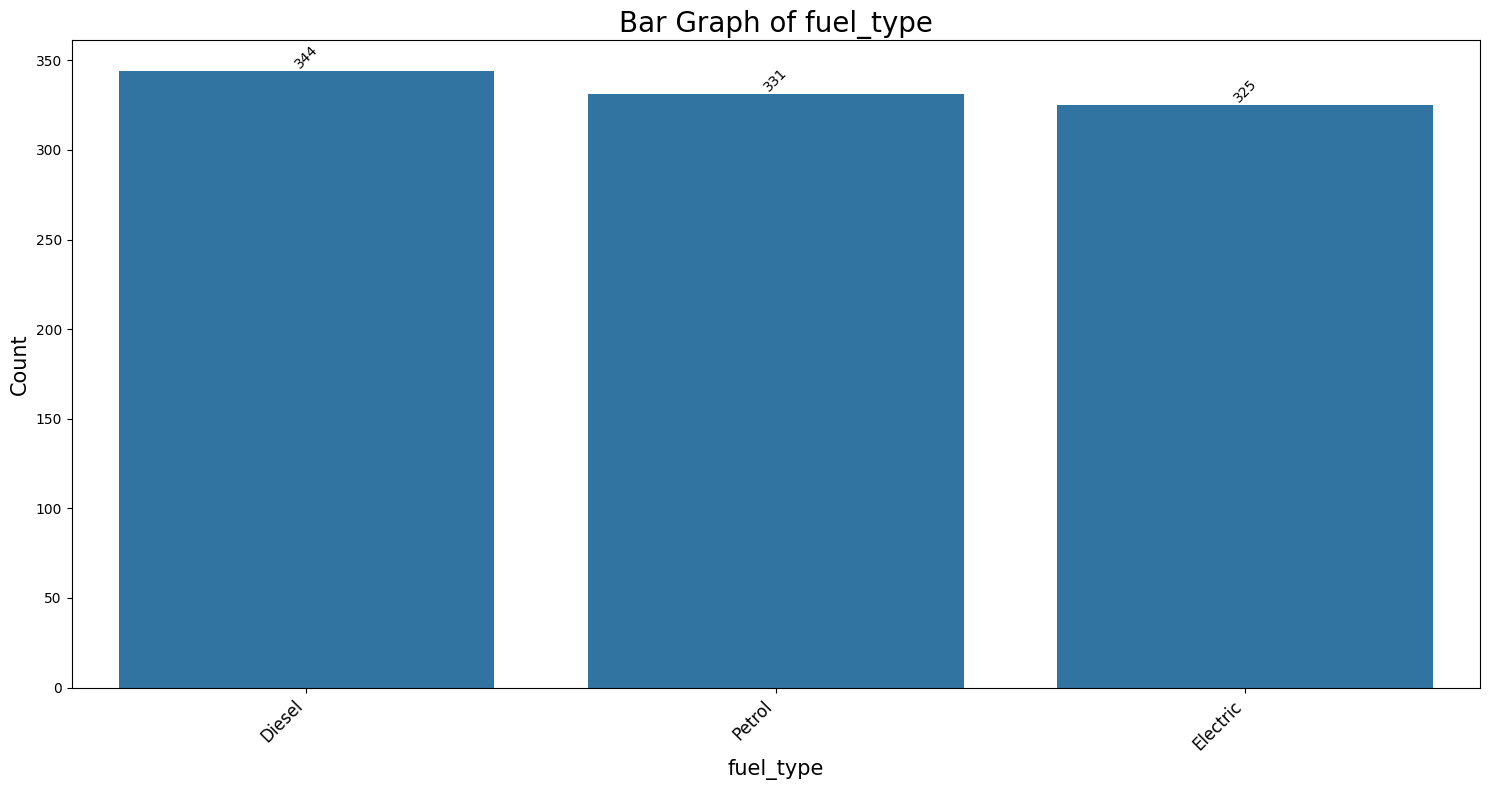

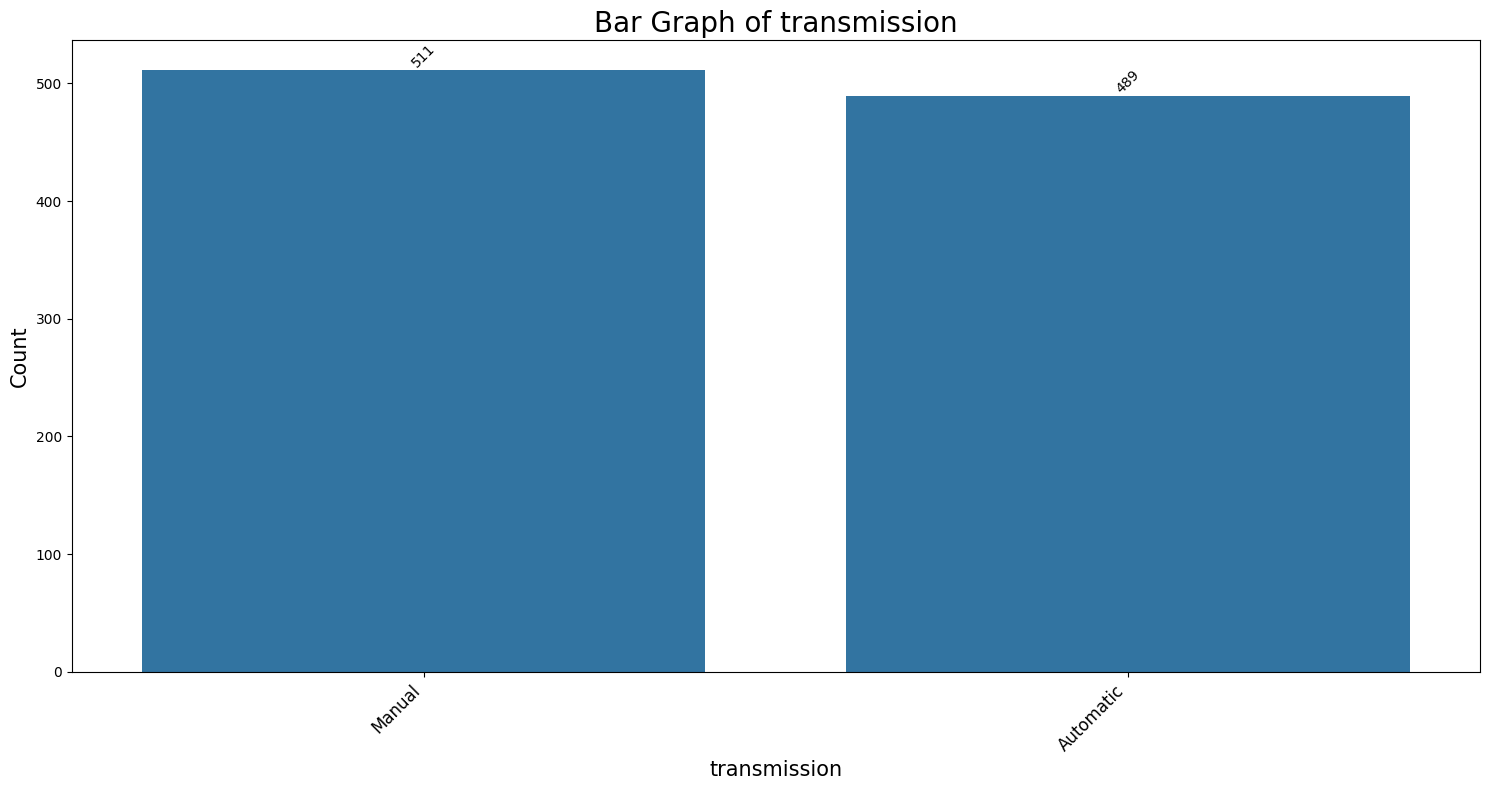

In [16]:
def plot_bar_graphs(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 8))
        ax = sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        ax.bar_label(ax.containers[0],rotation=45)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.title(f'Bar Graph of {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.tight_layout()
        plt.show()
plot_bar_graphs(df, categorical_columns)

Text(0.5, 1.0, 'Car Brands')

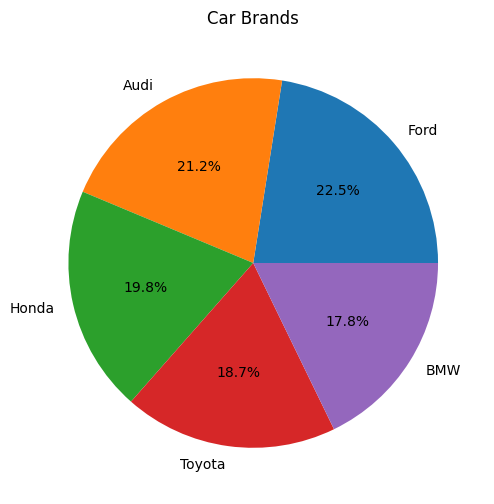

In [59]:
plt.figure(figsize=(10,6))
make_counts = df['make'].value_counts()
plt.pie(x = make_counts.values, labels=make_counts.index, autopct='%1.1f%%')
plt.title('Car Brands')

Text(0.5, 1.0, 'Models')

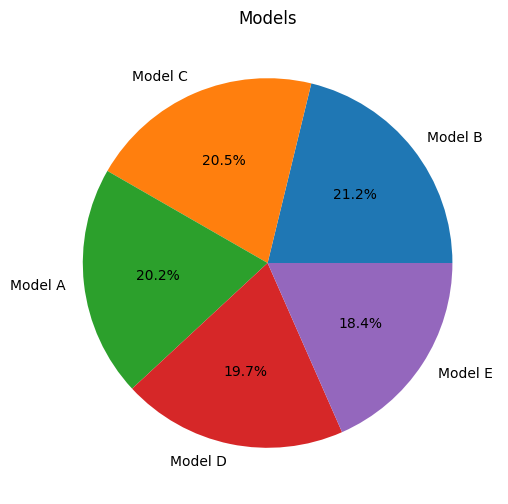

In [60]:
plt.figure(figsize=(10,6))
model_counts = df['model'].value_counts()
plt.pie(x = model_counts.values, labels=model_counts.index, autopct='%1.1f%%')
plt.title('Models')

Text(0.5, 1.0, 'Fuel Types')

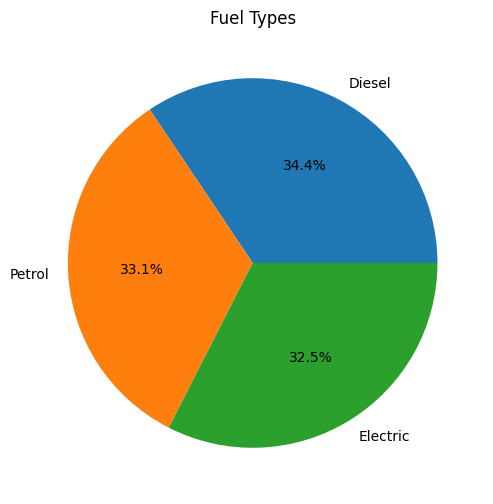

In [62]:
plt.figure(figsize=(10,6))
fuel_type_counts = df['fuel_type'].value_counts()
plt.pie(x = fuel_type_counts.values, labels=fuel_type_counts.index, autopct='%1.1f%%')
plt.title('Fuel Types')

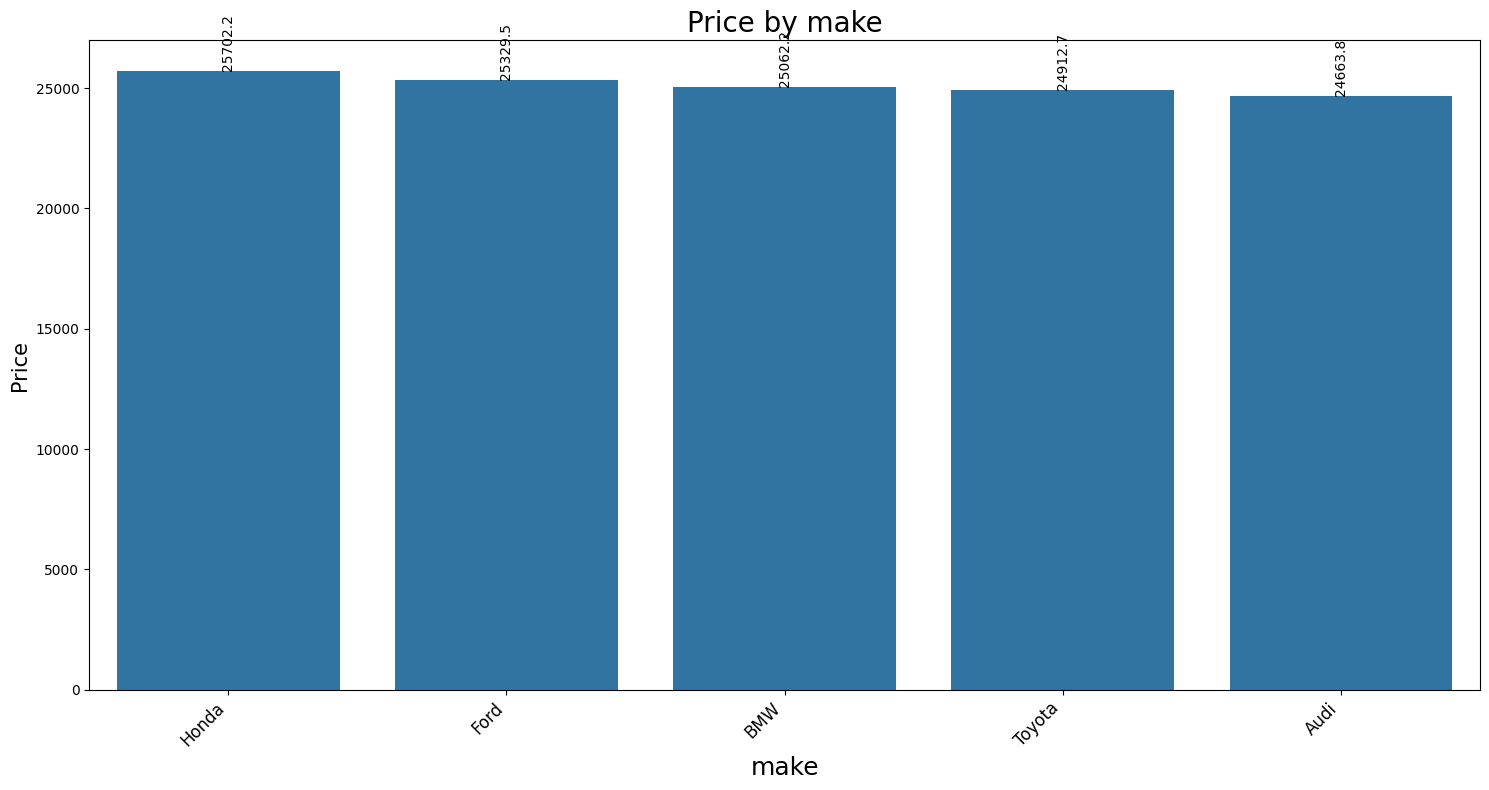

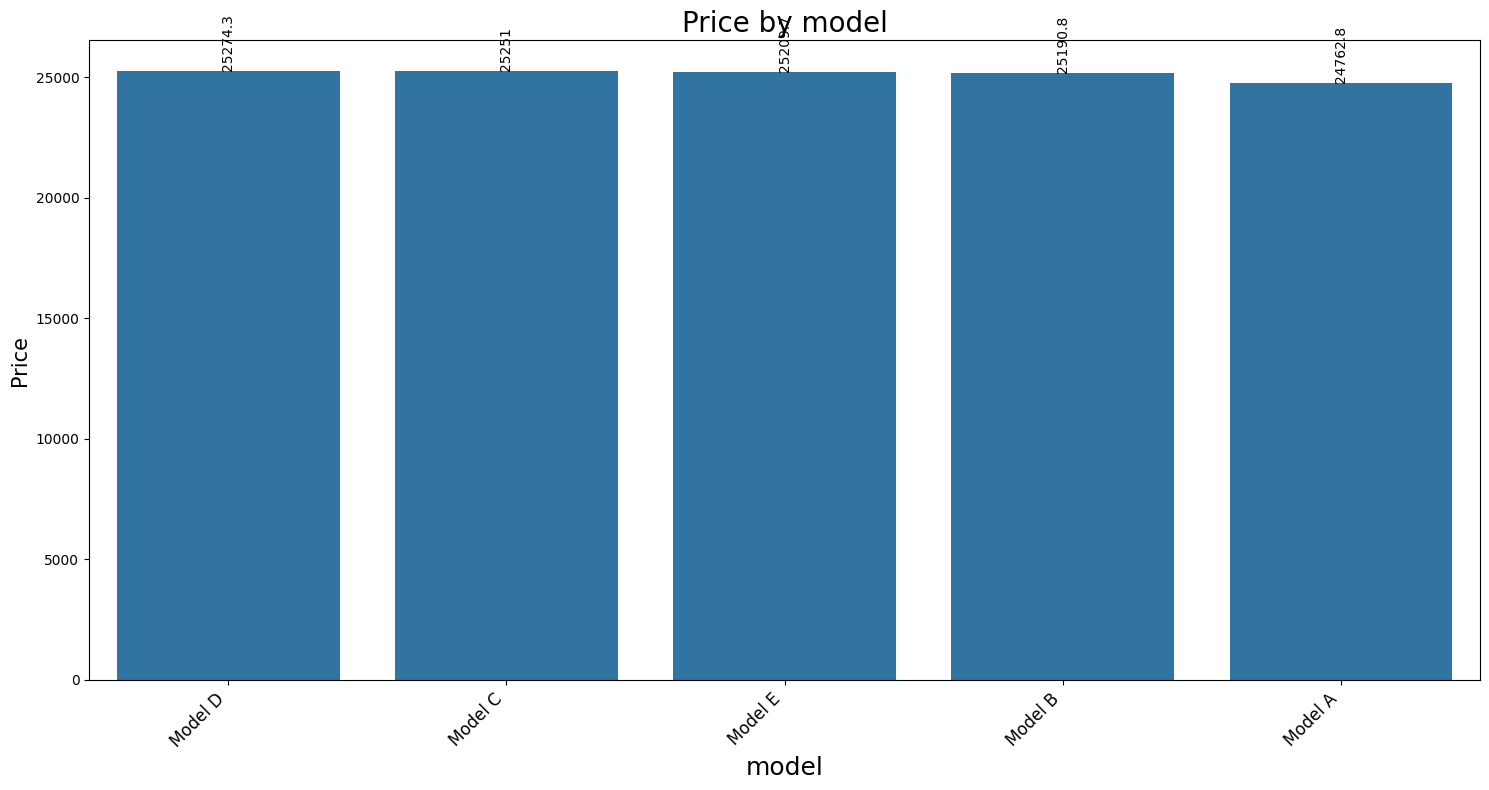

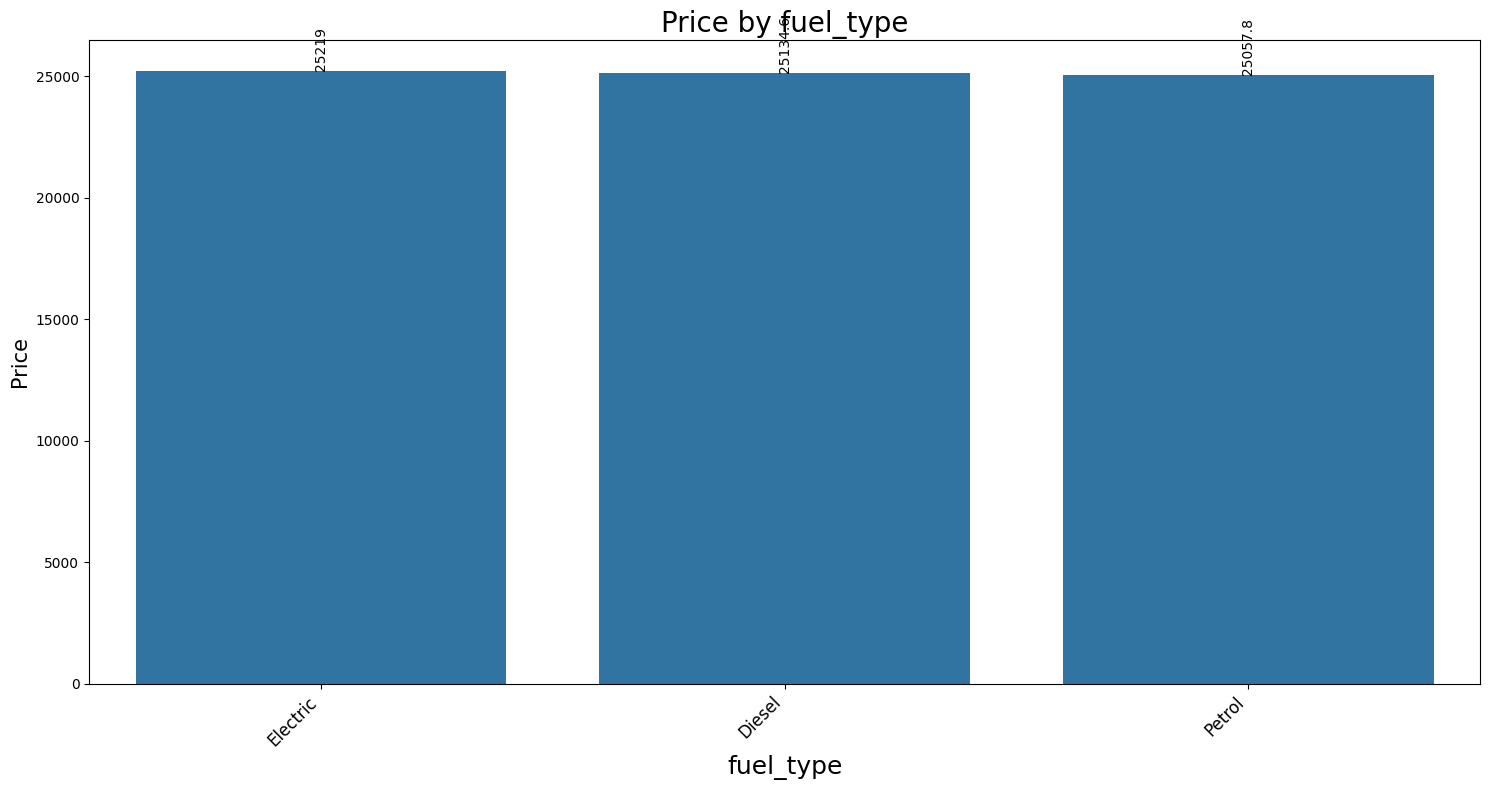

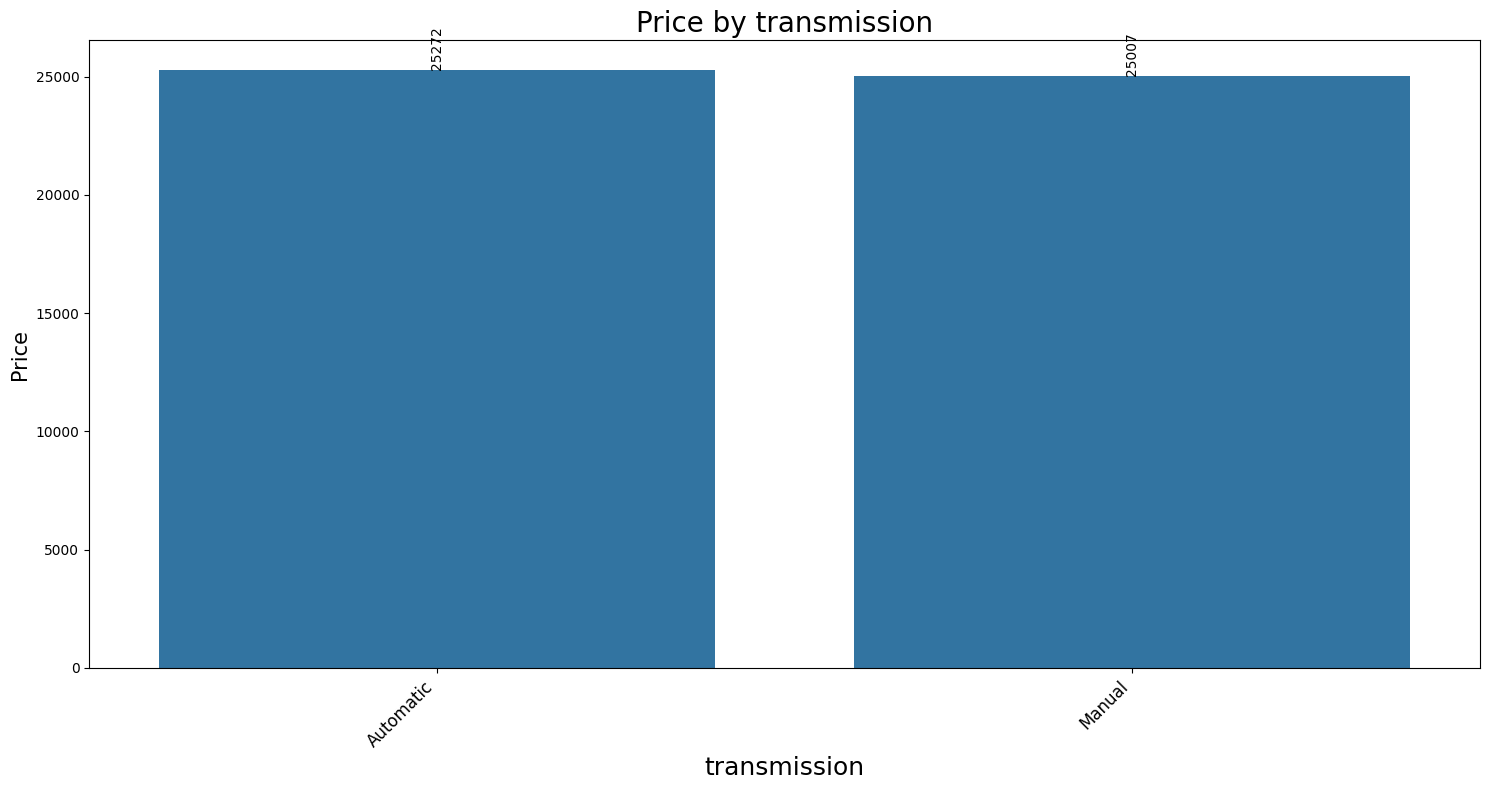

In [17]:
def plot_bar_with_target(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 8))
        grouped_data = df.groupby(column)['price'].mean().round(1).reset_index()
        grouped_data_sorted = grouped_data.sort_values(by='price', ascending=False)
        ax = sns.barplot(x=column, y='price', data=grouped_data_sorted, order=grouped_data_sorted[column])
        ax.bar_label(ax.containers[0],rotation=90)
        plt.xlabel(column, fontsize=18)
        plt.ylabel('Price', fontsize=15)
        plt.title(f'Price by {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.tight_layout()
        plt.show()
        
plot_bar_with_target(df, categorical_columns)

In [18]:
# Encoding data

In [19]:
categorical_columns

['make', 'model', 'fuel_type', 'transmission']

In [20]:
df_encoded = df.copy()
df_encoded = pd.get_dummies(df, columns=['make', 'transmission', 'fuel_type'], drop_first=True, dtype=int)

In [21]:
df_encoded.head()

,model,year,engine_size,mileage,price,make_BMW,make_Ford,make_Honda,make_Toyota,transmission_Manual,fuel_type_Electric,fuel_type_Petrol
0,Model B,2015,3.9,74176,30246.207931,0,0,1,0,1,0,1
1,Model C,2014,1.7,94799,22785.747684,0,1,0,0,0,1,0
2,Model B,2006,4.1,98385,25760.290347,1,0,0,0,1,1,0
3,Model B,2015,2.6,88919,25638.003491,0,0,1,0,0,1,0
4,Model C,2004,3.4,138482,21021.386657,0,0,1,0,0,0,1


In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_encoded['model'] = encoder.fit_transform(df_encoded['model'])

In [23]:
df_encoded.head()

,model,year,engine_size,mileage,price,make_BMW,make_Ford,make_Honda,make_Toyota,transmission_Manual,fuel_type_Electric,fuel_type_Petrol
0,1,2015,3.9,74176,30246.207931,0,0,1,0,1,0,1
1,2,2014,1.7,94799,22785.747684,0,1,0,0,0,1,0
2,1,2006,4.1,98385,25760.290347,1,0,0,0,1,1,0
3,1,2015,2.6,88919,25638.003491,0,0,1,0,0,1,0
4,2,2004,3.4,138482,21021.386657,0,0,1,0,0,0,1


In [24]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   model                1000 non-null   int64  
 1   year                 1000 non-null   int64  
 2   engine_size          1000 non-null   float64
 3   mileage              1000 non-null   int64  
 4   price                1000 non-null   float64
 5   make_BMW             1000 non-null   int64  
 6   make_Ford            1000 non-null   int64  
 7   make_Honda           1000 non-null   int64  
 8   make_Toyota          1000 non-null   int64  
 9   transmission_Manual  1000 non-null   int64  
 10  fuel_type_Electric   1000 non-null   int64  
 11  fuel_type_Petrol     1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [25]:
numeric_columns

['year', 'engine_size', 'mileage', 'price']

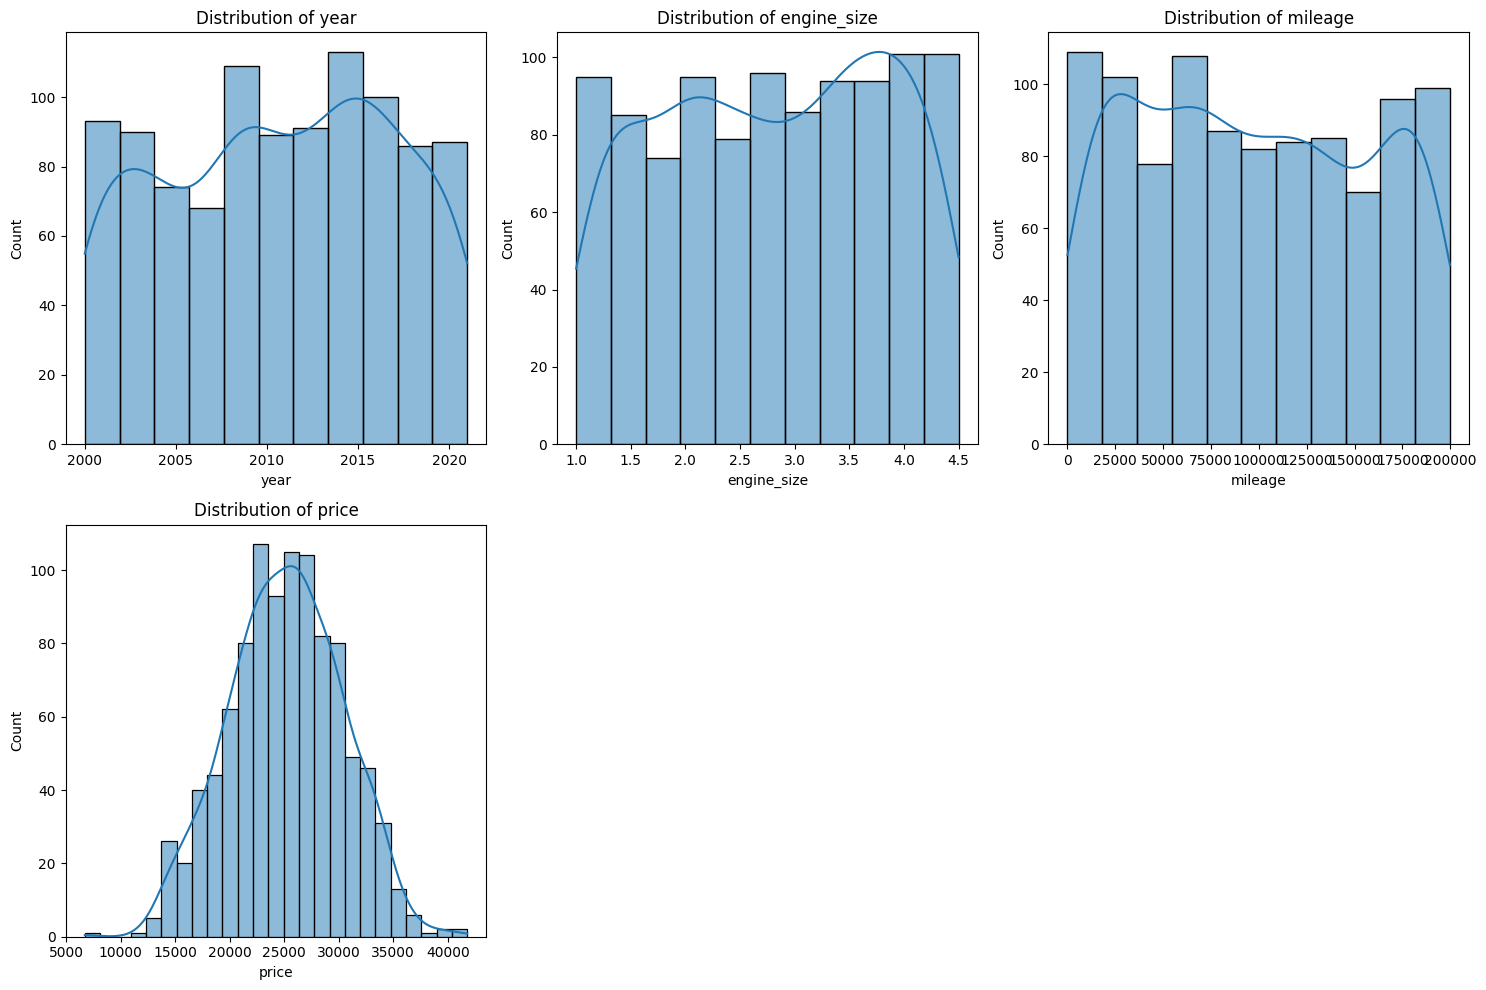

In [26]:
plt.figure(figsize=(15, 10))

num_vars = len(numeric_columns)

for i, var in enumerate(numeric_columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    
plt.tight_layout()
plt.show()

Text(40.847222222222214, 0.5, 'Price')

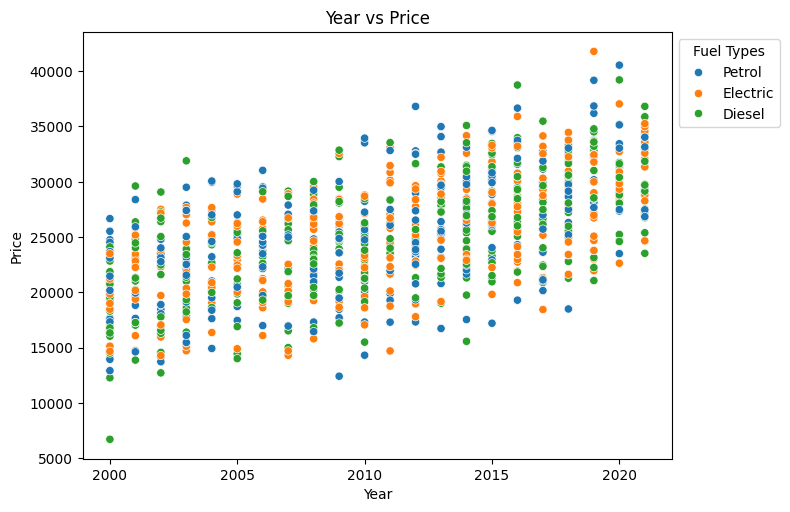

In [32]:
# year vs. price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='year', y='price', hue='fuel_type')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Fuel Types')
plt.tight_layout()

plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')

Text(40.847222222222214, 0.5, 'Price')

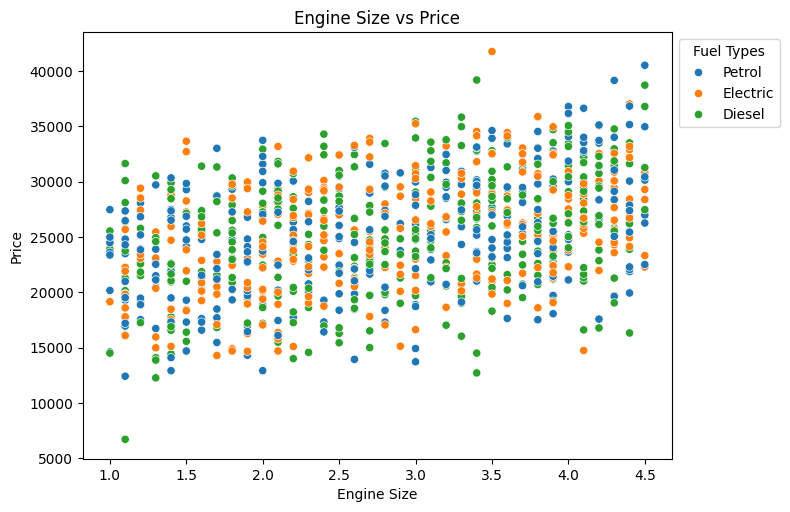

In [33]:
# engine_size vs. price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='engine_size', y='price', hue='fuel_type')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Fuel Types')
plt.tight_layout()

plt.title('Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')

Text(40.847222222222214, 0.5, 'Price')

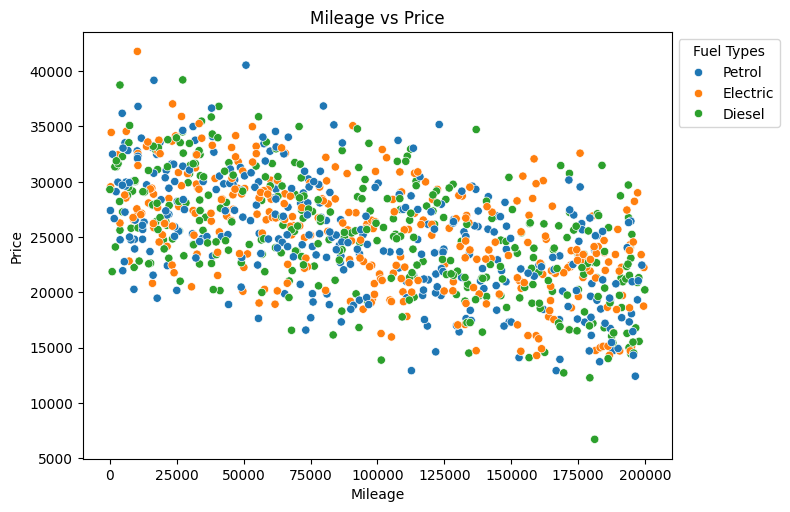

In [34]:
# mileage vs. price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='mileage', y='price', hue='fuel_type')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Fuel Types')
plt.tight_layout()

plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')

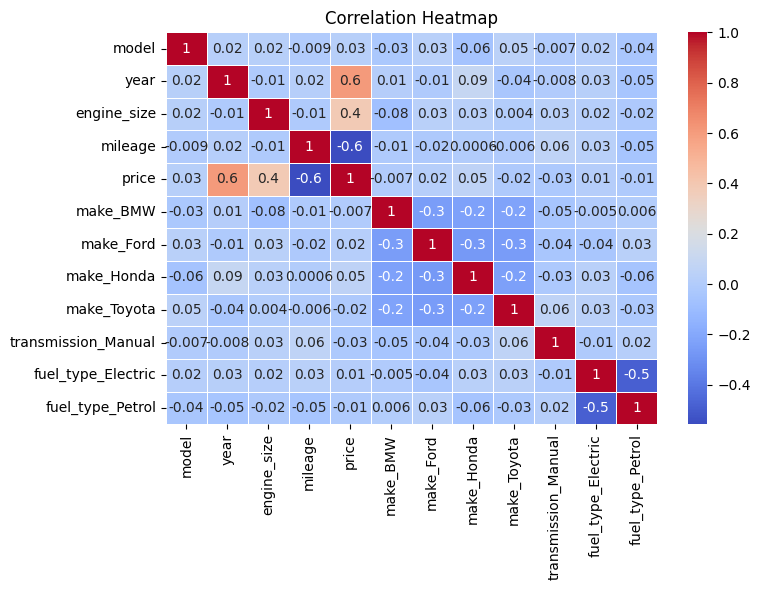

In [45]:
corr_matrix = df_encoded.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt='.1g', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()

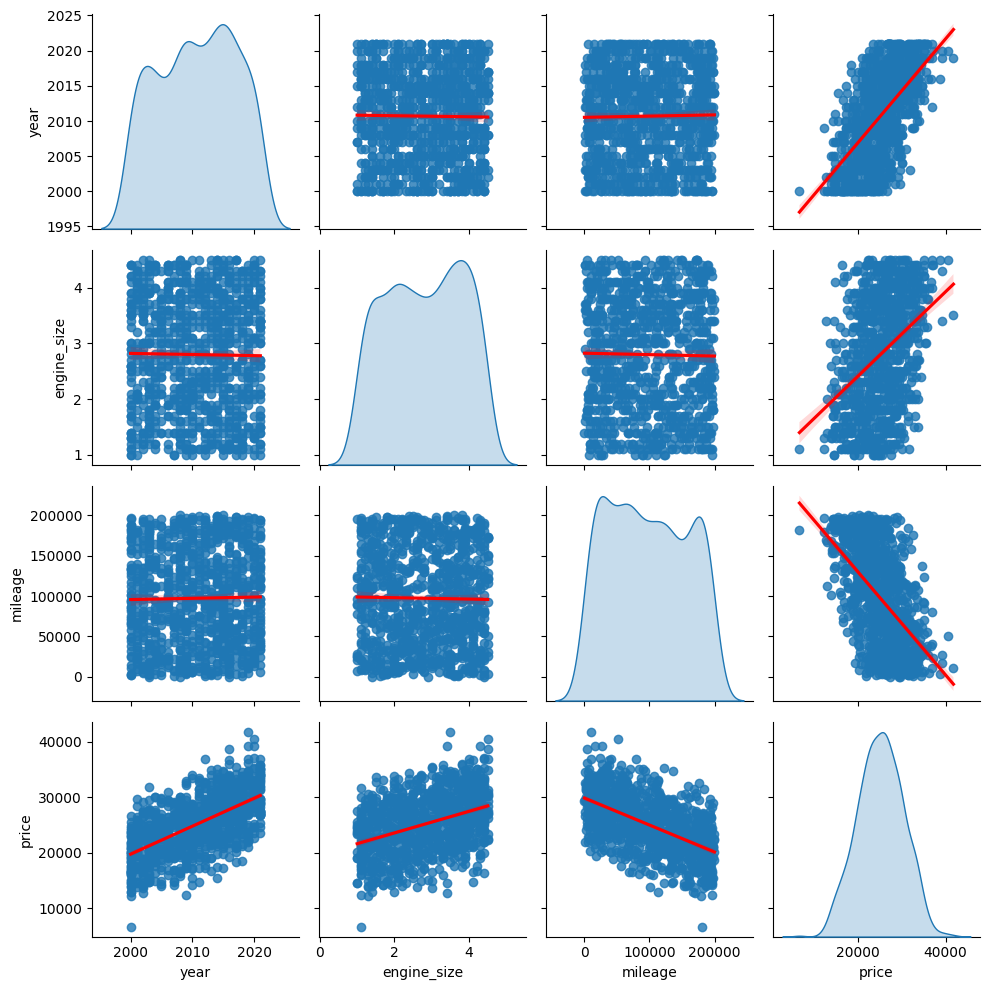

In [49]:
sns.pairplot(df,
             kind="reg",
             diag_kind="kde", 
             plot_kws={"line_kws": {"color": "red"}}
            )
plt.tight_layout()

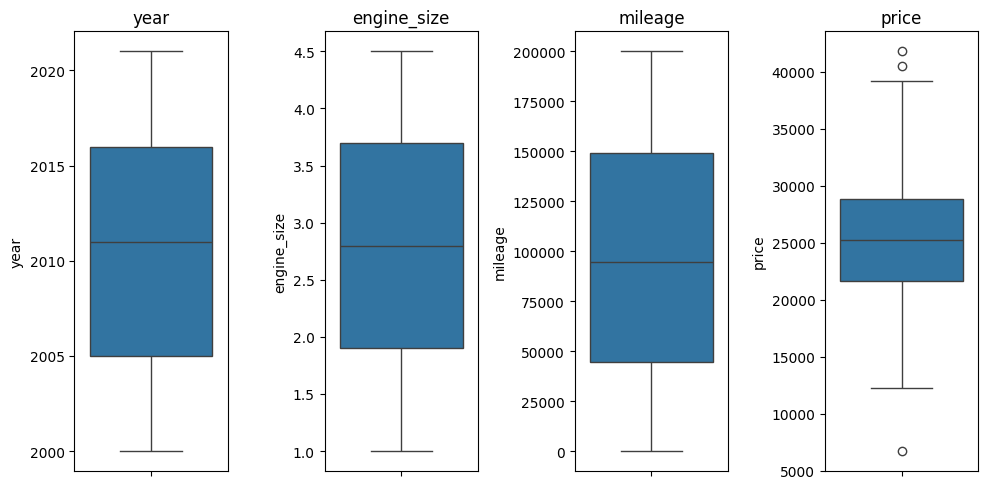

In [85]:
# Checking Outliers
x = 0
plt.figure(figsize=(30, 5))
for col in df.select_dtypes(include=['number']).columns:
    x += 1
    plt.subplot(1, 12, x)
    sns.boxplot(data=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [63]:
# Machine Learning

In [64]:
df_encoded.head()

,model,year,engine_size,mileage,price,make_BMW,make_Ford,make_Honda,make_Toyota,transmission_Manual,fuel_type_Electric,fuel_type_Petrol
0,1,2015,3.9,74176,30246.207931,0,0,1,0,1,0,1
1,2,2014,1.7,94799,22785.747684,0,1,0,0,0,1,0
2,1,2006,4.1,98385,25760.290347,1,0,0,0,1,1,0
3,1,2015,2.6,88919,25638.003491,0,0,1,0,0,1,0
4,2,2004,3.4,138482,21021.386657,0,0,1,0,0,0,1


In [65]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [66]:
X.head()

,model,year,engine_size,mileage,make_BMW,make_Ford,make_Honda,make_Toyota,transmission_Manual,fuel_type_Electric,fuel_type_Petrol
0,1,2015,3.9,74176,0,0,1,0,1,0,1
1,2,2014,1.7,94799,0,1,0,0,0,1,0
2,1,2006,4.1,98385,1,0,0,0,1,1,0
3,1,2015,2.6,88919,0,0,1,0,0,1,0
4,2,2004,3.4,138482,0,0,1,0,0,0,1


In [67]:
y

0      30246.207931
1      22785.747684
2      25760.290347
3      25638.003491
4      21021.386657
           ...     
995    22765.597091
996    30392.575567
997    16446.892292
998    27396.156708
999    31620.864907
Name: price, Length: 1000, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [70]:
X_train.shape

(750, 11)

In [71]:
X_test.shape

(250, 11)

In [72]:
X_train.corr()

,model,year,engine_size,mileage,make_BMW,make_Ford,make_Honda,make_Toyota,transmission_Manual,fuel_type_Electric,fuel_type_Petrol
model,1.000000,0.022448,0.045500,0.004574,0.000237,0.005873,-0.043550,0.042547,-0.031015,0.012549,-0.034540
year,0.022448,1.000000,-0.026638,0.017172,0.023546,-0.034990,0.112475,-0.033321,-0.008602,0.032195,-0.051473
engine_size,0.045500,-0.026638,1.000000,-0.040099,-0.087488,0.027912,0.045337,-0.000410,0.037126,0.015676,-0.013778
mileage,0.004574,0.017172,-0.040099,1.000000,-0.028366,-0.015072,0.003643,0.001877,0.047584,0.023853,-0.059159
make_BMW,0.000237,0.023546,-0.087488,-0.028366,1.000000,-0.243727,-0.232476,-0.222083,-0.053629,-0.004862,0.013652
make_Ford,0.005873,-0.034990,0.027912,-0.015072,-0.243727,1.000000,-0.275336,-0.263026,-0.047113,-0.059087,0.036039
make_Honda,-0.043550,0.112475,0.045337,0.003643,-0.232476,-0.275336,1.000000,-0.250885,-0.027091,0.008751,-0.039076
make_Toyota,0.042547,-0.033321,-0.000410,0.001877,-0.222083,-0.263026,-0.250885,1.000000,0.071634,0.063610,-0.042227
transmission_Manual,-0.031015,-0.008602,0.037126,0.047584,-0.053629,-0.047113,-0.027091,0.071634,1.000000,-0.005013,0.008128
fuel_type_Electric,0.012549,0.032195,0.015676,0.023853,-0.004862,-0.059087,0.008751,0.063610,-0.005013,1.000000,-0.495452


In [73]:
# redundancy, multicollinearity, overfitting
def correlation_for_dropping(df, threshold):
    columns_to_drop = set()
    corr = df_encoded.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                columns_to_drop.add(corr.columns[i])
    return columns_to_drop

In [74]:
columns_dropping = correlation_for_dropping(X_train, 0.85)

In [75]:
columns_dropping

set()

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [78]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

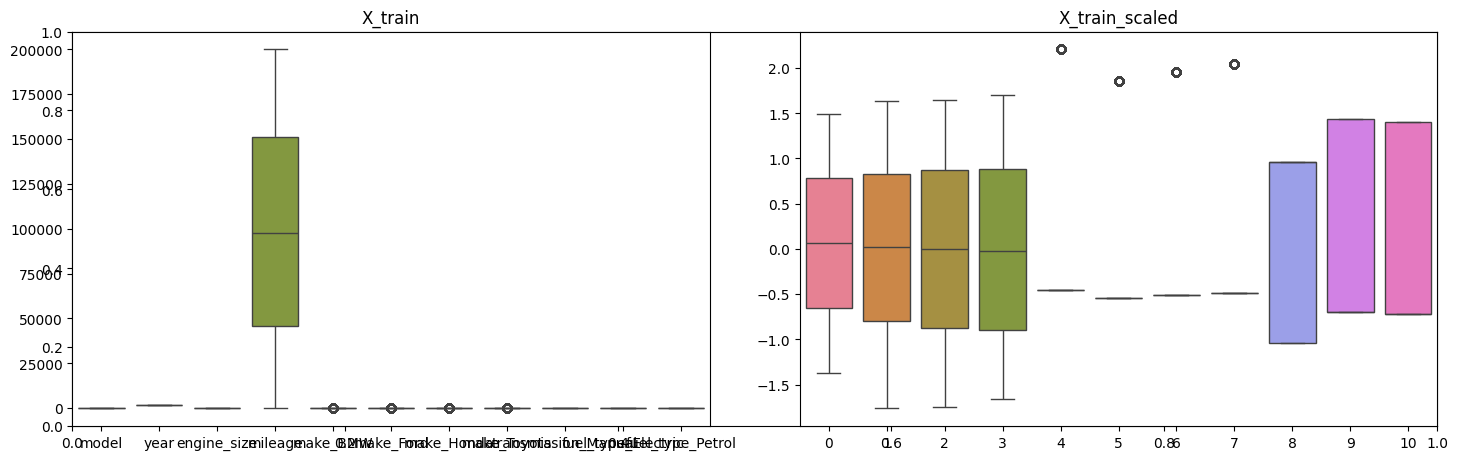

In [79]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train_scaled")
plt.tight_layout()
plt.show()

In [146]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Mean Absolute Error:  1718.6944938752163
Mean Squared Error:  4537829.253345104
R2 Score:  0.8295326420698447
Adjusted R2 Score: 0.821653898636098


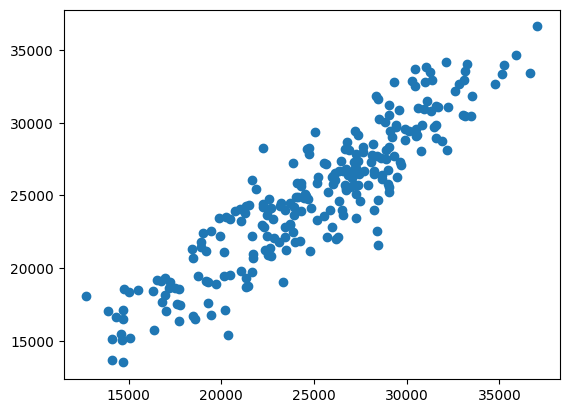

In [147]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)
print("Adjusted R2 Score:", 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error: 1706.7611509116584
Mean Squared Error: 4474079.65061535
R2 Score: 0.831927449309105
Adjusted R2 Score: 0.8241593902435594


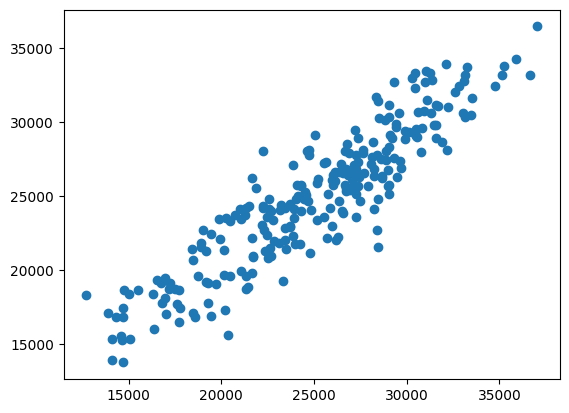

In [148]:
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", score)
print("Adjusted R2 Score:", 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
plt.scatter(y_test, y_pred)
plt.show()

In [149]:
lassocv.alpha_

np.float64(54.16509856970345)

In [150]:
df_encoded.head()

,model,year,engine_size,mileage,price,make_BMW,make_Ford,make_Honda,make_Toyota,transmission_Manual,fuel_type_Electric,fuel_type_Petrol
0,1,2015,3.90,74176,30246.21,0,0,1,0,1,0,1
1,2,2014,1.70,94799,22785.75,0,1,0,0,0,1,0
2,1,2006,4.10,98385,25760.29,1,0,0,0,1,1,0
3,1,2015,2.60,88919,25638.00,0,0,1,0,0,1,0
4,2,2004,3.40,138482,21021.39,0,0,1,0,0,0,1


In [151]:
df_encoded.iloc[0]

model                     1.00
year                   2015.00
engine_size               3.90
mileage               74176.00
price                 30246.21
make_BMW                  0.00
make_Ford                 0.00
make_Honda                1.00
make_Toyota               0.00
transmission_Manual       1.00
fuel_type_Electric        0.00
fuel_type_Petrol          1.00
Name: 0, dtype: float64

In [169]:
new_car = [[0, 2025, 4, 20000, 1,0,0,0, 0, 1,0]]
# --- New Car Prediction ---
# Model: Model A
# Year: 2025
# Engine Size: 4.0 L
# Mileage: 20000 km
# Make: BMW
# Transmission: Automatic
# Fuel Type: Electric

In [170]:
new_car_scaled = scaler.transform(new_car)

In [171]:
predicted_price = lassocv.predict(new_car_scaled)

In [172]:
predicted_price

array([38416.39337412])